# Coral Reef Bleaching Prediction Using BCO-DMO Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load dataset
df = pd.read_csv('/content/global_bleaching_environmental-fixed.csv')

# Replace 'nd' with -9999 and convert to numeric where applicable
df.replace('nd', -9999, inplace=True)
df=df.replace(to_replace=-9999,value=0)
df=df.replace(to_replace="-9999",value="0")
df=df.replace(to_replace="Population",value="1")
print(df["Bleaching_Level"].unique())

# Feature selection
features = [
    'Turbidity', 'SSTA_Standard_Deviation', 'Temperature_Mean', 'Distance_to_Shore', 'Cyclone_Frequency',
    'Temperature_Kelvin_Standard_Deviation', 'TSA_Mean', 'TSA_Standard_Deviation', 'TSA_DHW_Standard_Deviation',
    'TSA_Frequency_Standard_Deviation', 'SSTA_DHWMean', 'TSA', 'Temperature_Kelvin',
    'SSTA_Frequency_Standard_Deviation', 'SSTA_DHW_Standard_Deviation'
]
X = df[features]
y = df['Bleaching_Level']

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y.astype(str))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[0 '1']


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41228 entries, 0 to 41227
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Distance_to_Shore                      41228 non-null  float64
 1   Exposure                               41228 non-null  object 
 2   Turbidity                              41228 non-null  float64
 3   Cyclone_Frequency                      41228 non-null  float64
 4   Depth_m                                41228 non-null  float64
 5   Percent_Cover                          41228 non-null  float64
 6   Bleaching_Level                        41228 non-null  object 
 7   Percent_Bleaching                      41228 non-null  float64
 8   ClimSST                                41228 non-null  float64
 9   Temperature_Kelvin                     41228 non-null  float64
 10  Temperature_Mean                       41228 non-null  float64
 11  Te

In [4]:
# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

In [5]:
# --- SVM ---
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, decision_function_shape='ovo')
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

#svm = SVC()
#linear = SVC(kernel='linear', C=1, decision_function_shape='ovo')
#rbf = SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
#poly = SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
#sig = SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')

In [6]:
# --- LSTM ---
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm.add(Dense(1, activation='sigmoid'))
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)
lstm_pred_prob = lstm.predict(X_test_lstm)
lstm_pred = [1 if x > 0.5 else 0 for x in lstm_pred_prob]

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1031/1031 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5902 - loss: 0.6639
Epoch 2/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7242 - loss: 0.5741
Epoch 3/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7465 - loss: 0.5503
Epoch 4/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7588 - loss: 0.5279
Epoch 5/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7738 - loss: 0.5166
Epoch 6/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7801 - loss: 0.5056
Epoch 7/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7812 - loss: 0.5040
Epoch 8/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7873 - loss: 0.4968
Epoch 9/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7877 - loss: 0.4991
Epoch 10/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7877 - loss: 0.4958
Epoch 11/50
1031/1031 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7855 - loss: 0.4960
Epoch 12/50
1031/1031 ━━━━━━━━━━━━━━━━━━━

In [7]:
# --- XGBoost ---
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:58:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [8]:
# --- Decision Tree ---
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

In [9]:
# --- MLP Classifier ---
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_pred = mlp.predict(X_test_scaled)

In [10]:
# --- Evaluation Metrics ---
def evaluate(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1))) * 100
    return acc, mae, rmse, mape

rf_metrics = evaluate(y_test, rf_pred)
svm_metrics = evaluate(y_test, svm_pred)
lstm_metrics = evaluate(y_test, lstm_pred)
xgb_metrics = evaluate(y_test, xgb_pred)
dt_metrics = evaluate(y_test, dt_pred)
mlp_metrics = evaluate(y_test, mlp_pred)

In [11]:
# --- Results ---
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'LSTM', 'XGBoost', 'Decision Tree', 'Multilayer Perceptron' ],
    'Accuracy': [rf_metrics[0], svm_metrics[0], lstm_metrics[0], xgb_metrics[0], dt_metrics[0], mlp_metrics[0]],
    'MAE': [rf_metrics[1], svm_metrics[1], lstm_metrics[1], xgb_metrics[1], dt_metrics[1], mlp_metrics[1]],
    'RMSE': [rf_metrics[2], svm_metrics[2], lstm_metrics[2], xgb_metrics[2], dt_metrics[2], mlp_metrics[2]],
    'MAPE': [rf_metrics[3], svm_metrics[3], lstm_metrics[3], xgb_metrics[3], dt_metrics[3], mlp_metrics[3]]
})

print(results)

                   Model  Accuracy       MAE      RMSE       MAPE
0          Random Forest  0.985084  0.014916  0.122132   1.491632
1                    SVM  0.768979  0.231021  0.480647  23.102110
2                   LSTM  0.857628  0.142372  0.377322  14.237206
3                XGBoost  0.964953  0.035047  0.187209   3.504730
4          Decision Tree  0.983265  0.016735  0.129365   1.673539
5  Multilayer Perceptron  0.890856  0.109144  0.330369  10.914383


In [12]:
# Define the models dictionary
models = {
    "Random Forest": rf_pred,
    "SVM": svm_pred,
    "LSTM": lstm_pred,
    "XGBoost": xgb_pred,
    "Decision Tree": dt_pred,
    "Multilayer Perceptron": mlp_pred
}

In [13]:
# --- Classification Report Table ---
from sklearn.metrics import classification_report

for name, preds in models.items():
    print(f"=== {name} ===")
    print(classification_report(y_test, preds))

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3852
           1       0.98      0.99      0.99      4394

    accuracy                           0.99      8246
   macro avg       0.99      0.98      0.99      8246
weighted avg       0.99      0.99      0.99      8246

=== SVM ===
              precision    recall  f1-score   support

           0       0.85      0.61      0.71      3852
           1       0.73      0.91      0.81      4394

    accuracy                           0.77      8246
   macro avg       0.79      0.76      0.76      8246
weighted avg       0.79      0.77      0.76      8246

=== LSTM ===
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      3852
           1       0.82      0.94      0.88      4394

    accuracy                           0.86      8246
   macro avg       0.87      0.85      0.85      8246
weighted avg       0.86    

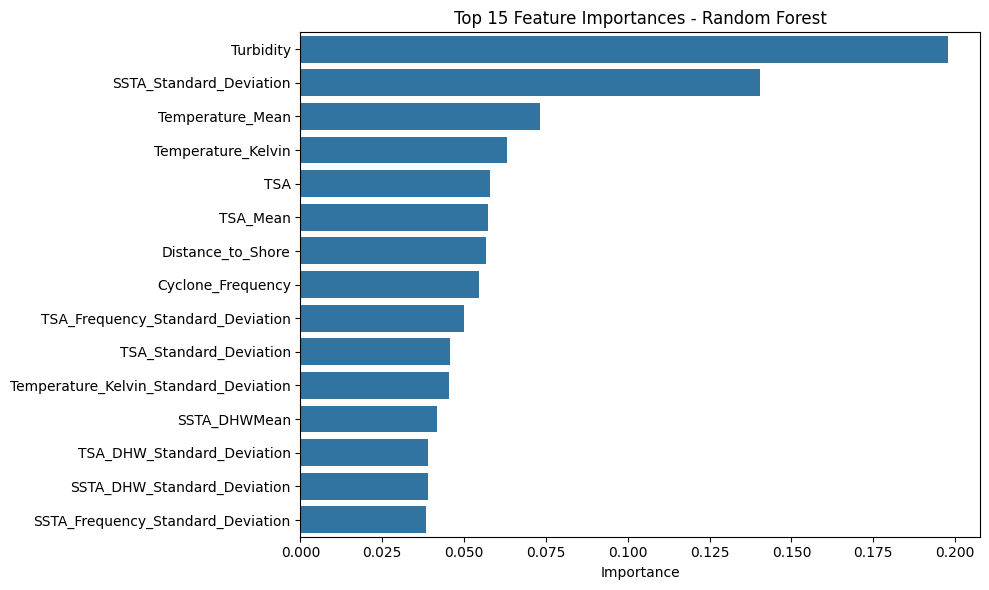

In [14]:
# --- Plot: Feature Importance (Using RF) ---
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for barplot
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = np.array(X.columns)[indices][:15]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:15], y=top_features)
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# --- Visualization ---
plt.figure(figsize=(12, 6))
sns.barplot(data=results.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

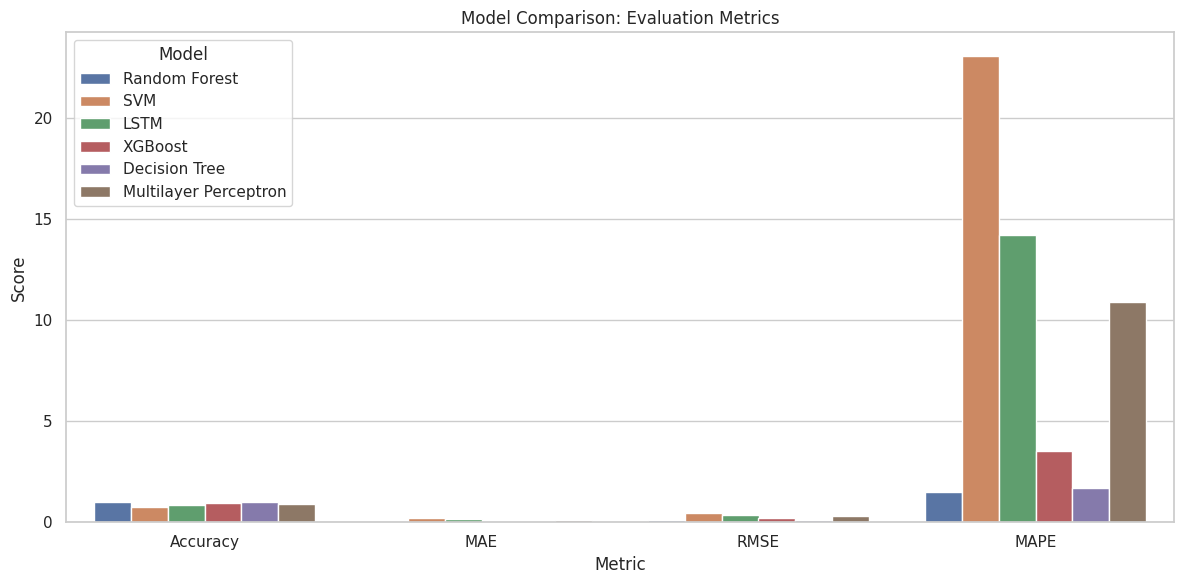

In [15]:
# --- Visualization ---
# Set style
sns.set(style="whitegrid")

# Melt the results DataFrame for easier plotting
results_melted = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=results_melted)
plt.title('Model Comparison: Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

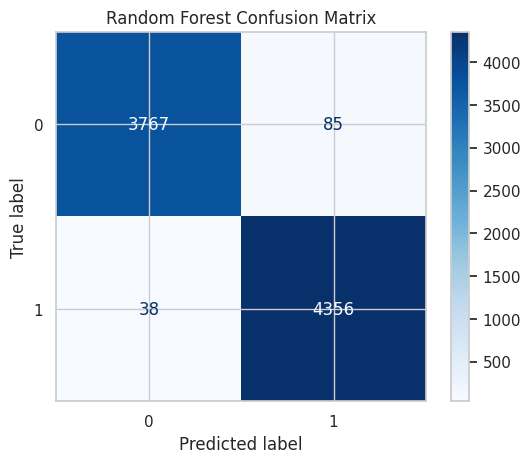

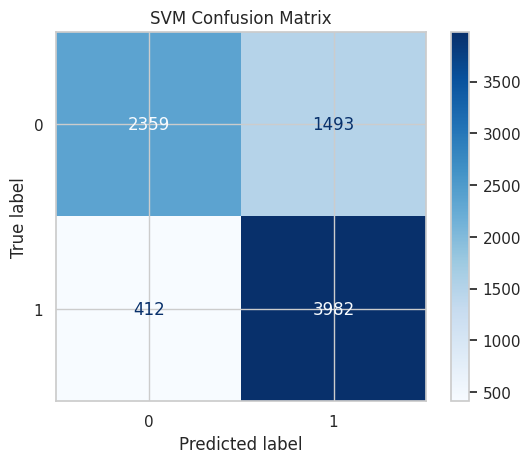

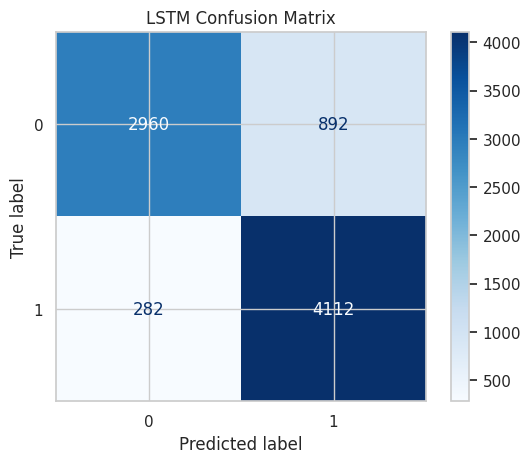

In [16]:
# --- Confusion Metrix ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    "Random Forest": rf_pred,
    "SVM": svm_pred,
    "LSTM": lstm_pred
}

for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


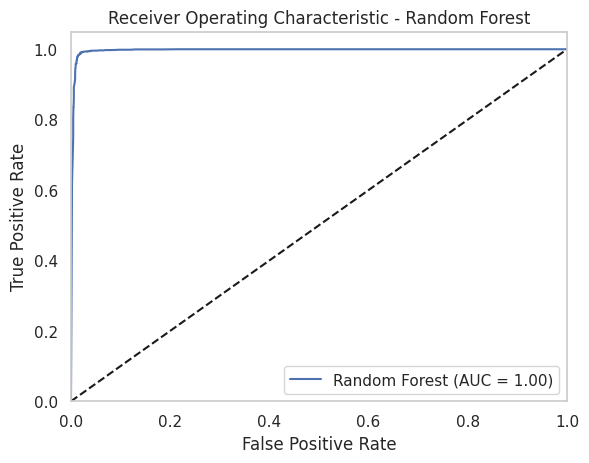

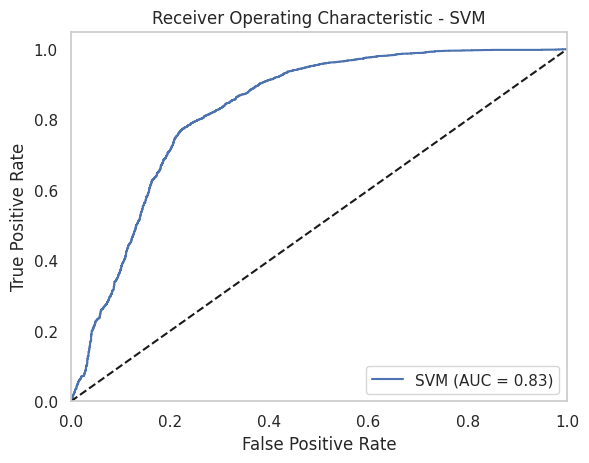

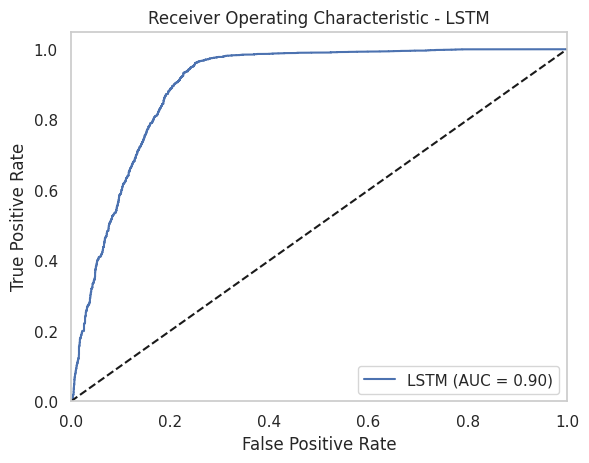

In [17]:
# --- ROC Curve and AUC ---
from sklearn.metrics import roc_curve, auc

def plot_roc(y_true, y_score, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# For RF and SVM we need predict_proba or decision_function
# Use the correct variable names: rf, svm, lstm
rf_probs = rf.predict_proba(X_test_scaled)[:, 1]  # Changed rf_model to rf
svm_probs = svm.decision_function(X_test_scaled) # Changed svm_model to svm
lstm_probs = np.array(lstm.predict(X_test_lstm)).flatten() # Changed lstm_model to lstm

plot_roc(y_test, rf_probs, 'Random Forest')
plot_roc(y_test, svm_probs, 'SVM')
plot_roc(y_test, lstm_probs, 'LSTM')